In [75]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic-dataset/Titanic-Dataset.csv


# Import Modules  


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Loading The Dataset  



In [7]:
train = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
test = pd.read_csv('/kaggle/input/titanic-dataset/Titanic-Dataset.csv')
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Statisctical Data


In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Datatype Info

In [9]:

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Exploratory Data Analysis

In [ ]:
sns.countplot(train['Survived'])

In [ ]:
sns.countplot(train['Pclass'])

In [ ]:
sns.countplot(train['Age'])
plt.xlabel('Age')
plt.ylabel('Count')


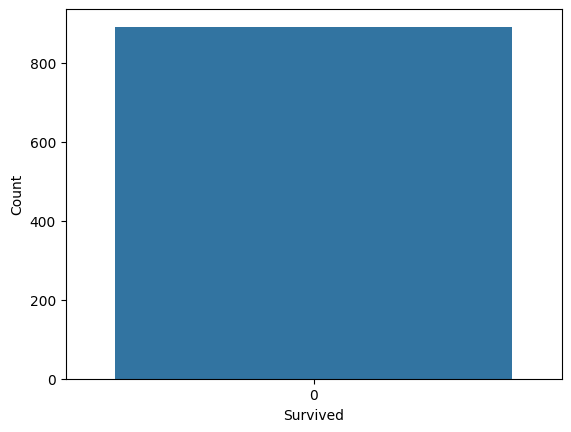

In [13]:
sns.countplot(train['Survived'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

# Numerical Attributes

<Axes: xlabel='Age', ylabel='Density'>

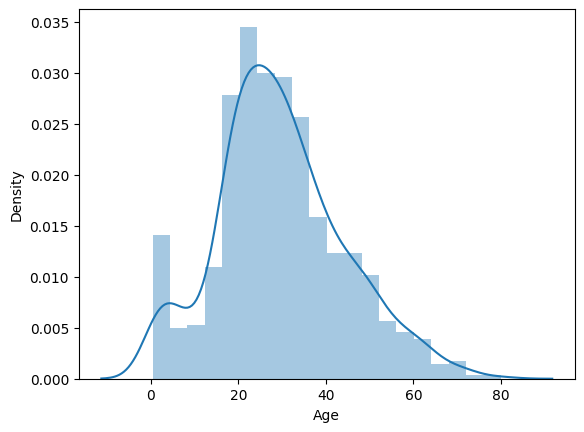

In [14]:
sns.distplot(train['Age'])

<Axes: xlabel='Fare', ylabel='Density'>

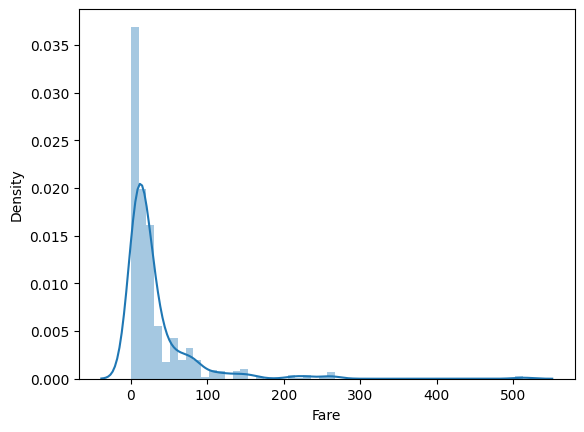

In [15]:
sns.distplot(train['Fare'])

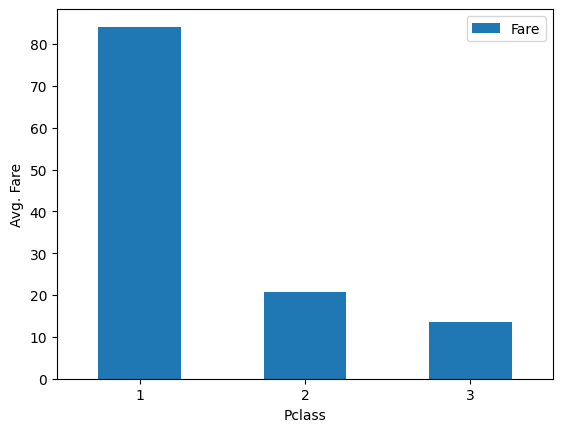

In [16]:
class_fare = train.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')  
plt.ylabel('Avg. Fare')  
plt.xticks(rotation=0)
plt.show()

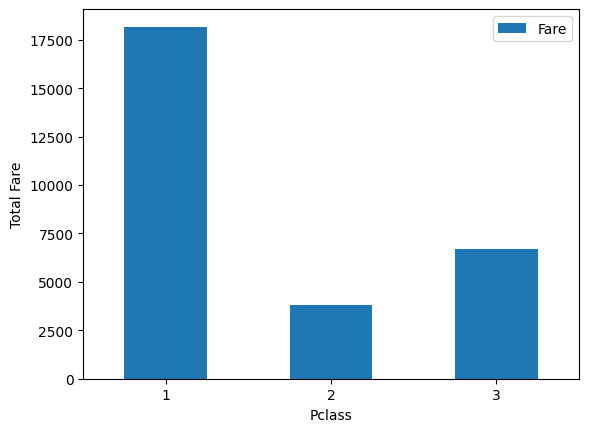

In [17]:
class_fare = train.pivot_table(index='Pclass', values='Fare', aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')  
plt.ylabel('Total Fare')  
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Pclass', ylabel='Fare'>

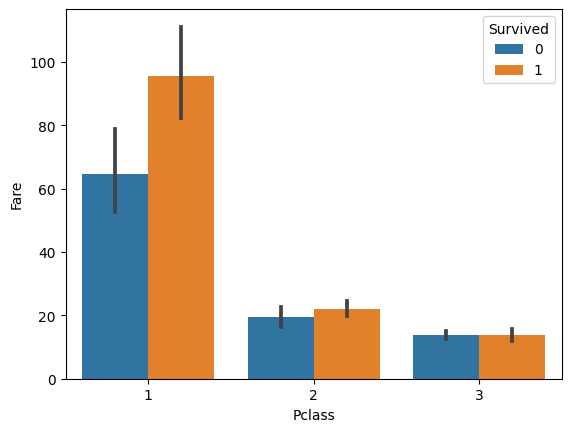

In [18]:
sns.barplot(data=train, x='Pclass', y='Fare', hue='Survived')

<Axes: xlabel='Survived', ylabel='Fare'>

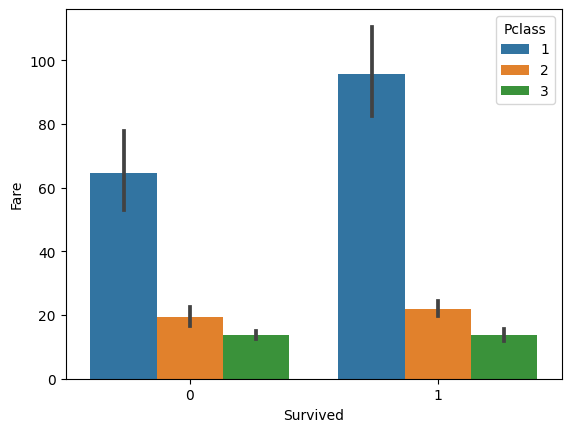

In [19]:
sns.barplot(data=train, x='Survived', y='Fare', hue='Pclass')

## Data Preprocessing

In [20]:
train_len = len(train)
# Combine two dataframes
df = pd.concat([train, test], axis=0)
df = df.reset_index()
df.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
df.tail()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1777,886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
1778,887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
1779,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
1780,889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
1781,890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


## Markdown Values

In [22]:
df.isnull().sum()

index             0
PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             354
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1374
Embarked          4
dtype: int64

In [23]:
# Drop or delete the column
df = df.drop(columns=['Cabin'], axis=1)

In [24]:
df['Age'].mean()

29.69911764705882

In [25]:
# Fill missing values using the mean of the column
df['Age'] = df ['Age'].fillna(df ['Age'].mean())
df ['Fare'] = df ['Fare'].fillna(df ['Fare'].mean())

In [26]:
df['Embarked'].mode()[0]

'S'

In [27]:
#fill missing values using mode of the categorical column
df['Embarked'] = df ['Embarked'].fillna(df ['Embarked'].mode()[0])

## Log transformation for uniform data distribution



<Axes: xlabel='Fare', ylabel='Density'>

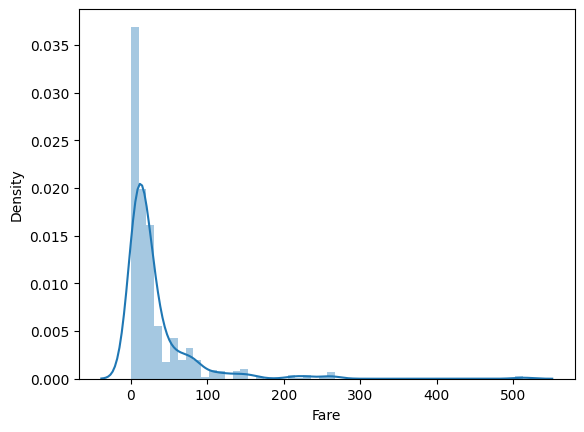

In [28]:
sns.distplot(train['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

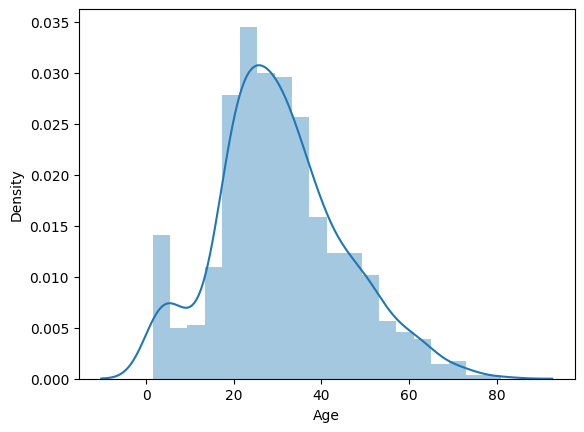

In [29]:
sns.distplot(train['Age']+1)

## Correlation Matrix

In [ ]:
# Calculate the correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
df.head()

## Drop Unneccessary Columns

In [31]:
df = df.drop(columns=['Name', 'Ticket'], axis=1)
print(df.head())

   index  PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0      0            1         0       3    male  22.0      1      0   7.2500   
1      1            2         1       1  female  38.0      1      0  71.2833   
2      2            3         1       3  female  26.0      0      0   7.9250   
3      3            4         1       1  female  35.0      1      0  53.1000   
4      4            5         0       3    male  35.0      0      0   8.0500   

  Embarked  
0        S  
1        C  
2        S  
3        S  
4        S  


In [36]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])

print(df.head())

   index  PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0      0            1         0       3    1  22.0      1      0   7.2500   
1      1            2         1       1    0  38.0      1      0  71.2833   
2      2            3         1       3    0  26.0      0      0   7.9250   
3      3            4         1       1    0  35.0      1      0  53.1000   
4      4            5         0       3    1  35.0      0      0   8.0500   

   Embarked  
0         2  
1         0  
2         2  
3         2  
4         2  


## Train Test Speed

In [37]:
train = df.iloc[:train_len, :]
test = df.iloc[:train_len, :]

In [39]:
train.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,1,2,1,1,0,38.0,1,0,71.2833,0
2,2,3,1,3,0,26.0,0,0,7.9250,2
3,3,4,1,1,0,35.0,1,0,53.1000,2
4,4,5,0,3,1,35.0,0,0,8.0500,2


In [42]:
# Input Split
x = train.drop(columns=['PassengerId','Survived'], axis=1)
y = train['Survived']

In [44]:
x.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,2,3,0,26.0,0,0,7.9250,2
3,3,1,0,35.0,1,0,53.1000,2
4,4,3,1,35.0,0,0,8.0500,2


## Model Training


In [50]:
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    scores = cross_val_score(model, x, y, cv=5)
    print(scores)
    print('CV Score:', np.mean(scores))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Assuming X and y are defined elsewhere
model = LogisticRegression()
classify(model, X, y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier model = DecisionTreeClassifier()
classify(model)

In [ ]:
from lightgbm import LGBMClassifier

# Assuming X and y are defined elsewhere
model = LGBMClassifier()
classify(model, X, y)

In [ ]:
from catboost import CatBoostClassifier
model = CatBoostClassifier (verbose=0)
classify(model)

## Complete Model Training With Full Data

In [ ]:
model = LGBMClassifier()
model.fit(x, y)

In [57]:
test.head()

,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,1,0,3,1,22.0,1,0,7.2500,2
1,1,2,1,1,0,38.0,1,0,71.2833,0
2,2,3,1,3,0,26.0,0,0,7.9250,2
3,3,4,1,1,0,35.0,1,0,53.1000,2
4,4,5,0,3,1,35.0,0,0,8.0500,2


In [65]:
# Input Split for test data
x_test = test.drop(columns=['PassengerId', 'Survived'], axis=1)


In [66]:
x_test.head()

,index,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,2,3,0,26.0,0,0,7.9250,2
3,3,1,0,35.0,1,0,53.1000,2
4,4,3,1,35.0,0,0,8.0500,2


In [68]:
pred=model.predict(x_test),
pred

(array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
        1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
        1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 

## Test Submission

In [ ]:
import pandas as pd

# Read the CSV file
sub = pd.read_csv('/kaggle/input/titanic-dataset/gender_submission.csv')

# Display the first few rows
sub.head()
